In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow_addons as tfa
from sklearn.metrics import confusion_matrix
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import pandas as pd
import os
import pathlib
import math
from itertools import islice 
import sys
sys.path.append('/workspace/detect-me/product_classifier/scripts')
from utils.data_loader import load_data_flow_from_directory,load_data_flow_from_dataframe

In [3]:
# from bidi.algorithm import get_display
# import arabic_reshaper

# def farsiz(string):
#     reshaped_text = arabic_reshaper.reshape(u'{}'.format(string))
#     return get_display(reshaped_text)

# LIST SAVED MODELS

In [4]:
BASE = '/workspace/detect-me/product_classifier/saved_models/by_category/'

In [5]:
!ls $BASE

resnet50  resnet50v2  tensorboard_logs


In [6]:
base_model_name = 'resnet50'

In [7]:
!ls $BASE/$base_model_name

'RESNET50---(Freeze-120)-(lr-0.0088-adam)-(opt_cb-cosine_learning_rate_decay)-(epoch-25)-(batch-18)-(dropout-0.1)-mixup-False-by_category_first_try__2021-Aug-04----133505'


In [8]:
!ls /workspace/detect-me/product_classifier/saved_models/milk/

densenet121  efficientnetb7  resnet50	 tensorboard_logs
densenet201  resnet152v2     resnet50v2  vgg16


In [9]:
# base_model_name = 'efficientnetb7'

In [10]:
# !ls /workspace/detect-me/product_classifier/saved_models/milk/$base_model_name

In [11]:

classifier_model_name_1='RESNET50---(Freeze-120)-(lr-0.0088-adam)-(opt_cb-cosine_learning_rate_decay)-(epoch-25)-(batch-18)-(dropout-0.1)-mixup-False-by_category_first_try__2021-Aug-04----133505'


In [12]:
csv = pd.read_csv(pathlib.Path(BASE) / base_model_name / classifier_model_name_1 / 'vms_code_mapping.csv')
train_count =\
    pd.read_csv(pathlib.Path(BASE) / base_model_name / classifier_model_name_1 / 'train_info.csv',
                          index_col=0,
                          names = ['code', 'count'])

In [13]:
joind_train_info = train_count.set_index('code').join(csv.set_index('code'))

In [14]:
joind_train_info = joind_train_info.reset_index()

In [15]:
# f'/workspace/product_classifier/saved_models/milk/{base_model_name}/{trained_model_name}'

In [16]:
# !rm -r '/workspace/product_classifier/s!rm -r '/workspace/product_classifier/saved_models/milk/resnet50/35_epoch_001_lr_finetune80/'aved_models/milk/resnet50/35_epoch_001_lr_finetune80/'

# LOAD MODEL

In [17]:
model = \
    load_model(
    pathlib.Path(BASE) / base_model_name / classifier_model_name_1,
#     custom_objects={"F1Score": tfa.metrics.F1Score}
#     compile=False
)
model.summary()

# probability_model = tf.keras.Sequential([model,
#                                          tf.keras.layers.Softmax()])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 224, 224, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              209817

# DATA GENERATOR 

In [23]:
cat = 'by_category'

In [25]:
csv_path = '/workspace/detect-me/product_classifier/sold60_12JUN.csv'

test_set = 'test'
train_val_dir = f'/workspace/detect-me/product_classifier/data/{cat}/train-val'
test_dir = f'/workspace/detect-me/product_classifier/data/{cat}/test'
# clear_directory(train_val_dir)
# clear_directory(test_dir)

data_flow = \
load_data_flow_from_dataframe(
    train_val_dir,
    test_dir,
    (224,224),
    1,
#     csv_path
)

# data_flow = \
# load_data_flow_from_directory(
#     train_val_dir,
#     test_dir,
#     (224,224),
#     1,csv_path)

print('\n'.join(data_flow.keys()))

len classes_set 57
load_with OUT_mixup_generator
Found 6850 validated image filenames belonging to 57 classes.
Found 1736 validated image filenames belonging to 57 classes.
Found 1 validated image filenames belonging to 57 classes.
train
validation
test
num_classes
class_indices
samples


In [26]:
import os
trainfiles = set(os.listdir(train_val_dir))
testfiles = set(os.listdir(test_dir))
testfiles - trainfiles

set()

# INFO

In [21]:
all_products = pd.read_csv('/workspace/detect-me/all_products.csv')
all_products = all_products.dropna(subset=['vms_food_id'])
all_products= all_products.astype({'vms_food_id' : int})
dict_milk_vms_title = all_products[all_products.CAT == 'MILK'][['vms_food_id','title']].set_index('vms_food_id').to_dict()

# np.unique(data_flow['train'].labels,return_counts=True)[0].shape

# # train_count_labels = pd.DataFrame(np.unique(data_flow['train'].labels,return_counts=True)).T
# # train_count_labels.columns = ['code', 'counts']
# # train_count_labels = csv.set_index('code').join(train_count_labels.set_index('code'))
# # # train_count_labels.to_csv('/workspace/detect-me/product_classifier/vms_count_in_trainset.csv')
# # # train_count_labels.to_csv('/workspace/sftp-files-from-BI-SRV/vms_count_in_trainset.csv')

# # from itertools import islice
# num_samples = data_flow['test'].samples
# test_images_labels = list(islice(data_flow['test'], num_samples))
# test_images , labels = list(zip(*test_images_labels))
# num_classes = data_flow['test'].num_classes
# test_labels = data_flow['test'].labels
# calss_mapping_dict = data_flow['test'].class_indices
# calss_mapping_dict = {y:x for x,y in calss_mapping_dict.items()}

In [27]:
joind_train_info = joind_train_info.assign(
    cuts = pd.cut(joind_train_info['count'],
                  bins=[0,5,10,20,30,40,100,200,1000],
                 labels=['vvlow' , 'vlow' , 'low', 'mid0', 'mid1', 'high', 'vhigh', 'vvhigh',  ])
)

In [28]:
vms_with_low_trainig = joind_train_info[joind_train_info['count'] <= 5]

<AxesSubplot:xlabel='bins'>

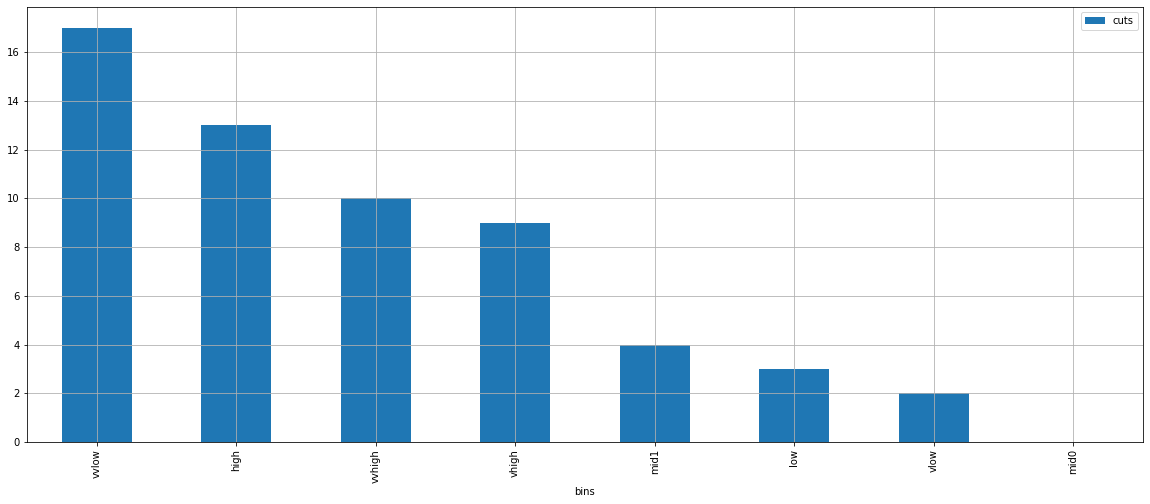

In [29]:
bins_count = joind_train_info['cuts'].value_counts().reset_index()

bins_count.columns = ['bins', 'cuts']

bins_count = bins_count.astype({'bins': str})

bins_count.plot(x='bins',
                y='cuts',
                kind='bar',
                figsize=(20,8),
                grid=True)

# VMS with low amount of training

In [25]:
vms_low = joind_train_info[joind_train_info['cuts'].isin(['vvlow' , 'vlow' , 'low'])]['vms']

In [26]:
vms_high = joind_train_info[joind_train_info['cuts'].isin(['vhigh', 'vvhigh'])]['vms']

In [27]:
# vms_low.to_csv('/workspace/vms_low.csv')

# MERGE TEST 

In [28]:
# import shutil
# import os

# for p in ['test_shelf_crop','test' , '21apr', 'urumai' , 'tirajeh']:
#     path = f'/workspace/detect-me/product_classifier/data/milk/{p}'
#     L = list(pathlib.Path(path).rglob('*.*'))
#     for file in L:
#         try:
#             vms = file.parent.name
#             dest = f'/workspace/detect-me/product_classifier/data/milk/merge_all_test/{vms}'
#             if not os.path.exists(dest):
#                 print('making files')
#                 os.makedirs(dest)
#             shutil.copy(file, dest)  # For newer Python.
#         except:
#             print(file)

# EVALUATE ON TEST DATE

In [30]:
model.evaluate(data_flow['test'])

1/1 [==============================] - 3s 3s/step - loss: 3.2186e-06 - accuracy: 1.0000 - Precision-tr-0.5: 1.0000 - Precision-tr-0.9: 1.0000 - fp: 0.0000e+00 - fn: 0.0000e+00 - recall-tr--0.5: 1.0000 - recall-tr--0.9: 1.0000


[3.2186455882765586e-06, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]

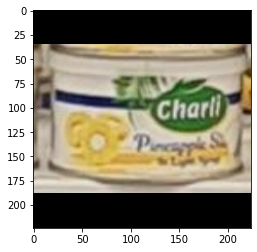

In [31]:
plt.imshow(next(data_flow['test'])[0][0,...].astype('uint8'))

In [30]:
Y_true = np.array(data_flow['test'].labels)
preds = model.predict(data_flow['test'])
preds = np.argmax(preds,axis=1)

In [31]:
joind_train_info_dict = joind_train_info.to_dict()

In [34]:
wrong_ones = np.where(Y_true!=preds)[0]
wrong_pred_true_value = zip(Y_true[wrong_ones],
                            preds[wrong_ones])
wrong_guesses = pd.DataFrame(list(wrong_pred_true_value))

wrong_guesses.columns=['Y_true',
                       'preds']

wrong_guesses = wrong_guesses.assign(
            vms_true= wrong_guesses['Y_true'].map(joind_train_info_dict['vms']),
            vms_pred= wrong_guesses['preds'].map(joind_train_info_dict['vms']))

labels_ = list(set([*Y_true,*preds]))
# set_Y_true =list(set(Y_true))
vms_true = [joind_train_info_dict['vms'].get(x) for x in labels_]
ll=[]
for x in vms_true:
    ll.append(dict_milk_vms_title['title'].get(int(x)))
ll = [farsiz(x) for x in ll]
zip_vms_code_title = zip(labels_,vms_true,ll )


sns.set(font_scale=1.8)
plt.figure(figsize=(40,40))


cm = confusion_matrix(Y_true, preds,
                      labels=labels_
                     )
b=cm.sum(axis=1).reshape(-1,1)
cm_p = np.divide(cm,
              b,
#               out=np.zeros_like(cm),
              where=b!=0
             )

df1 = pd.DataFrame(cm_p)
df2 = pd.DataFrame(cm)

cm_fr = ((df1*100).round(1).astype(str) + '%\n(' + df2.astype(str) + ')').values

ax_labels = [f'label {x} : vms {y} {z}' for x,y,z in zip_vms_code_title]

In [68]:
np.max(cm_p)

1.0

In [72]:
cm_p.shape

(193, 193)

In [75]:
(cm_p==1).sum(axis=1) == (cm_p==1).sum(axis=0)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [89]:
# cm_p[~np.isnan(np.where(cm_p==1, np.nan, cm_p)).any(axis=1),
#     ~np.isnan(np.where(cm_p==1, np.nan, cm_p)).any(axis=0)].shape

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(cm_p,
            square=True,
#             annot=cm_fr,fmt=''
           )

In [ ]:
# TOO BIG WITH TITLE
# fig = sns.heatmap(cm_p,
#             annot=cm_fr,
#                   fmt="",
#             xticklabels = ax_labels,
#             linewidths = 2,
#                   square=True,
#             yticklabels= ax_labels,
#            );
# # plt.savefig(f'/workspace/product_classifier/cm_on_{test_set}_{trained_model_name}.png', bbox_inches='tight')

# PREDICT

In [ ]:
# predictions = probability_model.predict(data_flow['test'])

In [ ]:
# predictions = model.predict(data_flow['test'])

698

In [83]:
test_images_labels = list(islice(data_flow['test'], data_flow['test'].n))
test_images , labels = list(zip(*test_images_labels))
predictions = model.predict(x for x in test_images)

## FUNCTIONS 

In [108]:
def plot_image(predictions_array, true_label, img, id_=''):
    true_label = np.argmax(true_label)
    predicted_label = np.argmax(predictions_array)
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = np.squeeze(img)
    img = img.astype(np.uint8)
    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("p: {} t: $\\bf{{{:4.0f}}}\\%$ \nVMS:({})-{}".format(
                                                    joind_train_info_dict['vms'][predicted_label],
                                                    100*np.max(predictions_array),
                                                    joind_train_info_dict['vms'][true_label],
                                                    id_),
                                color=color,
#                                 fontweight='bold',
                                fontsize=18.0)

def plot_value_array(predictions_array, true_label, get_n_first):
    true_label = np.argmax(true_label)
    
    args = np.argsort(predictions_array)[-1*get_n_first:][::-1]
    predictions_array_subset = predictions_array[args]
    xaxis_label = [joind_train_info_dict['vms'].get(x) for x in args]
#     true_label = true_label[i]
    
    plt.grid(False)
    plt.xticks(range(data_flow['test'].n))
    plt.xticks(rotation=90)
    plt.yticks([])
    thisplot = plt.bar(xaxis_label,
                       predictions_array_subset,
                       color="#777777")
    
    ax = plt.gca()
    ax.set_yscale('log')
    #     plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array_subset)
    thisplot[predicted_label].set_color('red')
    if true_label in args:
        thisplot[np.argwhere(args==true_label).item()].set_color('blue')
    return predictions_array_subset 


def add_text(ax, text, fontsize, bbox='red_box', rotation=0):
    xlim = ax.get_xlim()
    xrange = xlim[1] - xlim[0]
    ylim = ax.get_ylim()
    yrange = ylim[1] - ylim[0]
    
    if bbox == 'red_box':
        bBox = dict(facecolor='red', alpha= 0.5, pad= 20)
    elif bbox == 'blue_arrow':
        bBox = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2 ,alpha =.5)
    ax.text(xrange/3,
            yrange/2,
            text,
            style='italic',
            bbox= bBox,
           fontsize = fontsize,
           rotation = rotation
           )
#     if annotate:
#         ax.annotate('',
#                     xy=(xrange/2,
#                         ylim[0]),
#                     xytext=(xrange/2, (5.8*yrange)/6),
#                 arrowprops=dict(facecolor='black', shrink=0.05 , alpha=0.1))



In [85]:
joind_train_info = joind_train_info.reset_index()

In [109]:
def wrong_guess_info(wrong_guesses):
    
    m = pd.merge(left=joind_train_info, left_on='code',
            right=wrong_guesses, right_on='Y_true', how='right')
    m = m.rename({'counts': 'num_in_train__(true_label)'}, axis=1)
    m.drop('code', axis=1, inplace=True)

    mm = pd.merge(left=joind_train_info, left_on='code',
            right=m, right_on='preds', how='right')
    mm = mm.rename({'count': 'num_in_train__(wrong_guess)'}, axis=1)
    return mm

In [106]:
wrong_guess_info_df = wrong_guess_info(wrong_guesses)
wrong_guess_info_df

,code,count_x,vms_x,count_y,vms_y,Y_true,preds,vms_true,vms_pred
0,122,66,283215,44,106673,4,122,106672,283212
1,81,63,235797,44,106673,4,81,106672,234285
2,140,72,301106,76,108692,6,140,106813,301105
3,78,74,234283,64,171721,21,78,164323,233231
4,79,98,234284,77,171722,22,79,171721,234283
...,...,...,...,...,...,...,...,...,...
70,85,140,244920,52,48676,221,85,48675,244410
71,85,140,244920,52,48676,221,85,48675,244410
72,122,66,283215,53,49092,228,122,48684,283212
73,140,72,301106,30,49095,231,140,49094,301105


# plot wrong ones 

In [ ]:
num_rows = wrong_guess_info_df.shape[0]//2+1
num_cols = 2
num_images = num_rows*num_cols
fig = plt.figure(figsize=(5*2*num_cols, 4*num_rows))
y = 0
j= 0
for i in range(data_flow['test'].n):
    if np.argmax(predictions[i]) == np.argmax(labels[i]):
        continue
    j += 1
    plt.subplot(num_rows, 2*num_cols, 2*y+1)
    plot_image(predictions[i], labels[i], test_images[i], i)
    plt.subplot(num_rows, 2*num_cols, 2*y+2)
    plot_value_array(predictions[i], labels[i], 10)
    y+=1
plt.tight_layout()
plt.show()

# PLOT For ALL 

In [ ]:
# num_rows = 10
# num_cols = 3
# num_images = num_rows*num_cols
# fig = plt.figure(figsize=(5*2*num_cols, 4*num_rows))
# for i in range(min(num_images, num_samples)):
#     plt.subplot(num_rows, 2*num_cols, 2*i+1)
#     plot_image(predictions[i], labels[i], test_images[i])
#     plt.subplot(num_rows, 2*num_cols, 2*i+2)
#     plot_value_array(predictions[i], labels[i], 10)
# plt.tight_layout()
# plt.show()

# SINGLE IMAGE plot first N guesses

### from directory

In [32]:
vms = 12548

In [33]:
!ls /workspace/detect-me/product_classifier/data/milk/test/$vms/

tmp67pcm7y2.jpg  tmpezugvz57.jpg  tmprv8dp5e7.jpg  tmpyjiuopen.jpg
tmpa6b1p49c.jpg  tmppn18rcp5.jpg  tmpxfcxqt1l.jpg


In [34]:
# Image.open('/workspace/product_classifier/data/milk/train-val/12548/4.jpg')

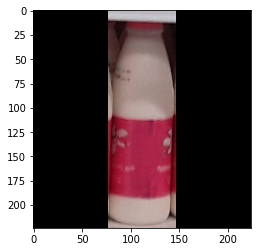

In [35]:
# image_name = 'tmp65dgnof7.jpg'
# img_path = f'/workspace/product_classifier/data/milk/test/{vms}/{image_name}'

# img_path = '/workspace/product_classifier/data/random/dogh.jpg'
# img_path = '/workspace/product_classifier/data/milk/test/tmp67pcm7y2.jpg'
img_path = '/workspace/detect-me/product_classifier/data/milk/test/12548/tmprv8dp5e7.jpg'
vitro_image_test = image.load_img(img_path,
                                  target_size=(224, 224),
#                                  interpolation='bilinear'
                                 )

vitro_image_test = image.img_to_array(vitro_image_test)
vitro_image_test = np.expand_dims(vitro_image_test,
                                  axis=0)

imgrgb = vitro_image_test[0,...].astype(np.uint8)

plt.imshow(imgrgb)

In [115]:
imgrgb = np.fliplr(imgrgb)

In [41]:
oo = model.predict(vitro_image_test)

In [42]:
ss = np.argsort(oo)[::-1][:5]

In [59]:
first_five = csv.set_index('code').loc[ss.flatten()[:5]]

In [ ]:
first_five

In [57]:
category_csv = pd.read_csv('/workspace/detect-me/product_classifier/data/by_category/secCat_codes.csv')

In [71]:
category_csv[category_csv.SecCat.str.contains('شیر')]

,Unnamed: 0,SecCat,SecCat_codes
7,70,افزودنی های شیرینی پزی,13
58,661,انواع شیرینی,15
76,955,شیر,59
99,3406,حلوا ارده و شیره,31


In [67]:
category_csv[category_csv.SecCat_codes == 23]

,Unnamed: 0,SecCat,SecCat_codes
36,316,بهداشت و مراقبت بدن,23


,vms
code,
23,46
43,78
30,58
4,107
36,65


In [36]:
# imG = test_images[29]
# imgrgb = imG[0,...].astype(np.uint8)
# plt.imshow(imgrgb)

vitro_image_test = np.expand_dims(imgrgb,
                                  axis=0)

In [38]:
def add_text(ax, text, fontsize, bbox='red_box', rotation=0):
    xlim = ax.get_xlim()
    xrange = xlim[1] - xlim[0]
    ylim = ax.get_ylim()
    yrange = ylim[1] - ylim[0]
    
    if bbox == 'red_box':
        bBox = dict(facecolor='red', alpha= 0.5, pad= 20)
    elif bbox == 'blue_arrow':
        bBox = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2 ,alpha =.5)
    ax.text(xrange/3,
            yrange/2,
            text,
            style='italic',
            bbox= bBox,
           fontsize = fontsize,
           rotation = rotation
           )

def plot_first_guess(model , image , n=5):
#     first_n_preds_N = 5
    image_c = image.copy()
    predictions_output = model.predict(image_c)
    predictions_output = np.squeeze(predictions_output)
    ss = np.argsort(predictions_output)[::-1][:n]

    first_n_preds = zip(predictions_output[ss],
                        ss,
                        [joind_train_info_dict.get(x) for x in ss])

    first_n_preds = list(first_n_preds)


    fig, axes = plt.subplots(n+1, # +1   first row true label
                             5,
                             figsize=(20, 30))

    [ax.axis('off') for ax in axes.flatten()]
    # row 0 
    imgrgb = image_c[0,...]
    axes[0,0].imshow(imgrgb.astype('uint8'))
    axes[0,1].imshow(preprocess_input(imgrgb))
#     axes[0,1].imshow(resnet50.preprocess_input(imgrgb))
#     axes[0,1].imshow(resnet_v2.preprocess_input(imgrgb))
    axes[0,2].imshow(preprocess_input(preprocess_input(imgrgb)))
    add_text(axes[0,3], 'VMS::', 10, rotation=0)
    add_text(axes[0,4], 'Predictions %', 20,bbox ='blue_arrow', rotation=-90)

    for i , (prob, label , vms) in enumerate(first_n_preds):
        plot_with_vms(vms, axes[i+1,:4])
        add_text(axes[i+1,4], f'{prob:.4%}\nvms {vms}', 22)

    plt.tight_layout()
    plt.show()
    
def plot_with_vms(vms, axes):
    milk_data_dir = '/workspace/detect-me/product_classifier/data/milk/'
    num = 4
    ncols = 4
    plt.figure(figsize=(10,10))
    path = milk_data_dir + 'train-val'
    for dirs in os.listdir(path):
        print(dirs)
        if dirs.endswith(str(vms)):
            p = os.path.join(path, dirs)
#             print(p)
            break
            
    list_images = list(pathlib.Path(p).rglob('*.jpg'))
    
    zip_axes = zip(np.random.choice(list_images, num), axes)
    for i, (image, ax) in enumerate(zip_axes):
        
        rows = math.ceil(4/ncols)
#         plt.subplot(rows,ncols,i+1)
            
#     plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
        print(image)
        image , label = np.array(Image.open(image)), vms
        image = image.astype(np.uint8)
        ax.axis('off')
        
        ax.imshow(image[...])
#         plt.imshow(image[...],
#     #                cmap=plt.cm.binary
#                   )
        

In [39]:
plot_first_guess(model, vitro_image_test, 6)

NameError: name 'joind_train_info_dict' is not defined

## PLOT images by vms in TRAIN-VAL TEST 

In [6]:
import PIL
import shutil

In [7]:
train_folder = pathlib.Path('/workspace/detect-me/product_classifier/data/milk/train-val')
test_folder = pathlib.Path('/workspace/detect-me/product_classifier/data/milk/test')

In [8]:
def take_images_by_vms(vms, folder):
    vms_folder=list(pathlib.Path(folder).glob(vms))[0]
    print(vms_folder)
    list_images = list(pathlib.Path(vms_folder).rglob('*.jpg'))
    print(list_images[0])
#     images_p = np.random.choice(list_images, number)
    images = [(np.array(PIL.Image.open(image)),image) for image in list_images]
    return images              
        

In [9]:
wrong_guess_info_df.groupby(['vms_true', 'vms_pred']).size().sort_values(ascending=False)

NameError: name 'wrong_guess_info_df' is not defined

In [160]:
wrong_guess_info_df[wrong_guess_info_df.vms_pred == '301105']

,code,vms_x,num_in_train__(wrong_guess),vms_y,num_in_train__(true_label),Y_true,preds,vms_true,vms_pred
13,123,301105,162,276017,26,106,123,276017,301105
14,123,301105,162,276017,26,106,123,276017,301105
